<a href="https://colab.research.google.com/github/Ken-Lau-Lab/single-cell-lectures/blob/main/section01_scRNAseq_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## __Section 1:__ Introduction to scRNA-seq

February 9, 2022

In [1]:
import scanpy as sc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [23]:
adata = sc.read_h5ad('data/GSM3305227_Tumor_1_Full.h5ad')

In [24]:
adata

AnnData object with n_obs × n_vars = 1206 × 25507

In [25]:
adata.raw = adata

In [26]:
adata.X

array([[ 0.,  1.,  1., ...,  3., 29.,  0.],
       [ 0.,  2.,  0., ...,  8., 26.,  0.],
       [ 0.,  2.,  1., ...,  4., 19.,  0.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  4.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [27]:
sc.pp.normalize_total(adata)
adata.X = np.arcsinh(adata.X).copy()
sc.pp.scale(adata)

In [28]:
adata.X

array([[-0.05946521, -0.41953042,  0.02996312, ..., -0.3932026 ,
         0.18577212, -0.13756137],
       [-0.05946521, -0.28825733, -0.27226427, ...,  0.43774483,
         0.47934684, -0.13756137],
       [-0.05946521, -0.2808065 ,  0.21556213, ..., -0.05931247,
         0.235544  , -0.13756137],
       ...,
       [-0.05946521,  1.04291   , -0.27226427, ..., -0.6984315 ,
         0.4845017 , -0.13756137],
       [-0.05946521, -0.4824658 , -0.27226427, ..., -0.6984315 ,
        -1.2679867 , -0.13756137],
       [-0.05946521,  2.0092986 , -0.27226427, ..., -0.6984315 ,
         0.316134  , -0.13756137]], dtype=float32)

In [29]:
sc.set_figure_params(dpi=200)

In [30]:
adata.var_names

Index(['0610006L08Rik', '0610007P14Rik', '0610009B22Rik', '0610009E02Rik',
       '0610009L18Rik', '0610009O20Rik', '0610010F05Rik', '0610010K14Rik',
       '0610011F06Rik', '0610012D04Rik',
       ...
       'mt-Co2', 'mt-Co3', 'mt-Cytb', 'mt-Nd1', 'mt-Nd2', 'mt-Nd3', 'mt-Nd4',
       'mt-Nd4l', 'mt-Nd5', 'mt-Nd6'],
      dtype='object', length=25507)

In [31]:
adata.var['Mitochondrial'] = adata.var.index.str.startswith('mt-')
sc.pp.calculate_qc_metrics(adata,qc_vars=['Mitochondrial'],use_raw=True,inplace=True)

In [32]:
sc.pp.pca(adata,random_state=0)

In [33]:
neighborhood_k = np.sqrt(adata.n_obs).astype(int) #We have found that scaling the K to equal the square root of the total number of neighbors to be effective
sc.pp.neighbors(adata,n_neighbors=neighborhood_k,use_rep='X_pca',random_state=0) #Calculate this KNN based off of the PCA distances

In [34]:
sc.tl.leiden(adata,resolution=0.5,random_state=0) #Here we use a resolution of 2, which should yield 30+ clusters. This step may take a while.

In [35]:
#Differential gene expression testing using the .raw values
sc.tl.rank_genes_groups(adata,groupby='leiden',use_raw=True,n_genes=200,method='wilcoxon')

/home/andy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


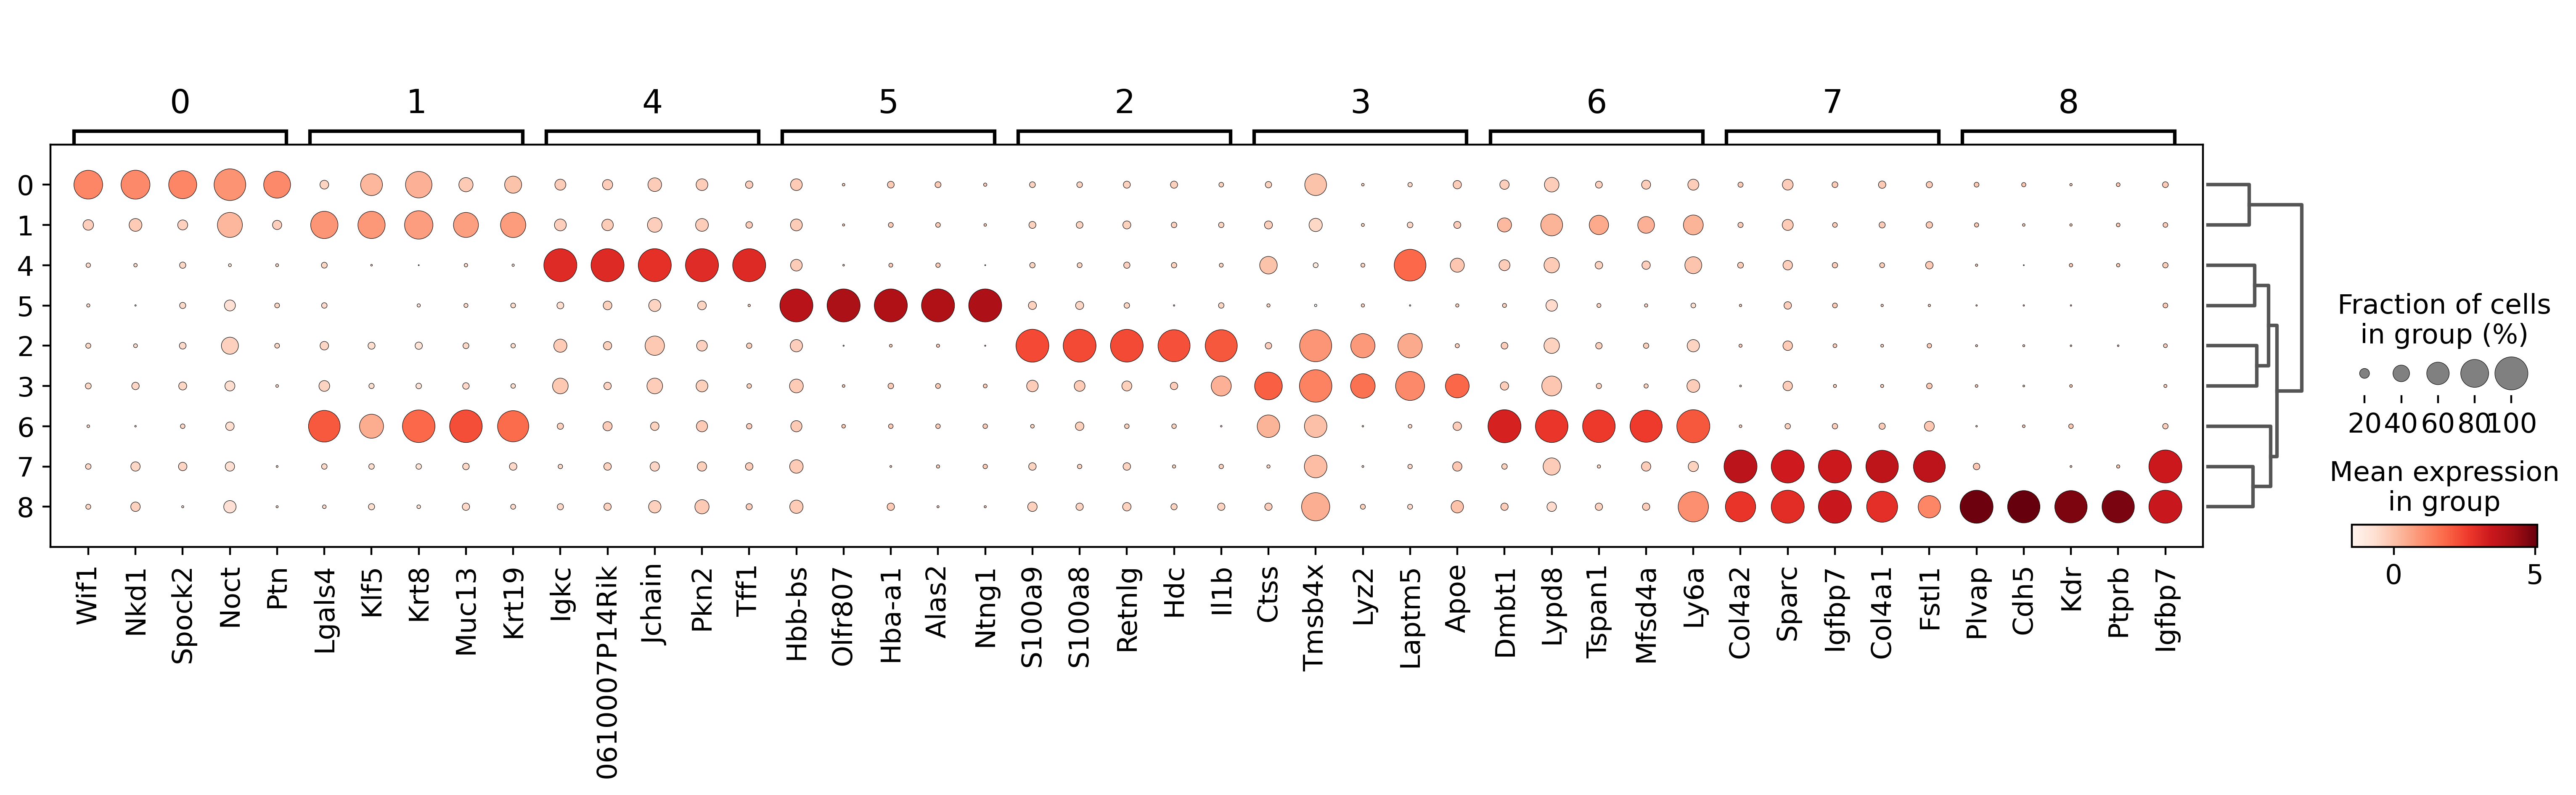

In [38]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, use_raw=False)

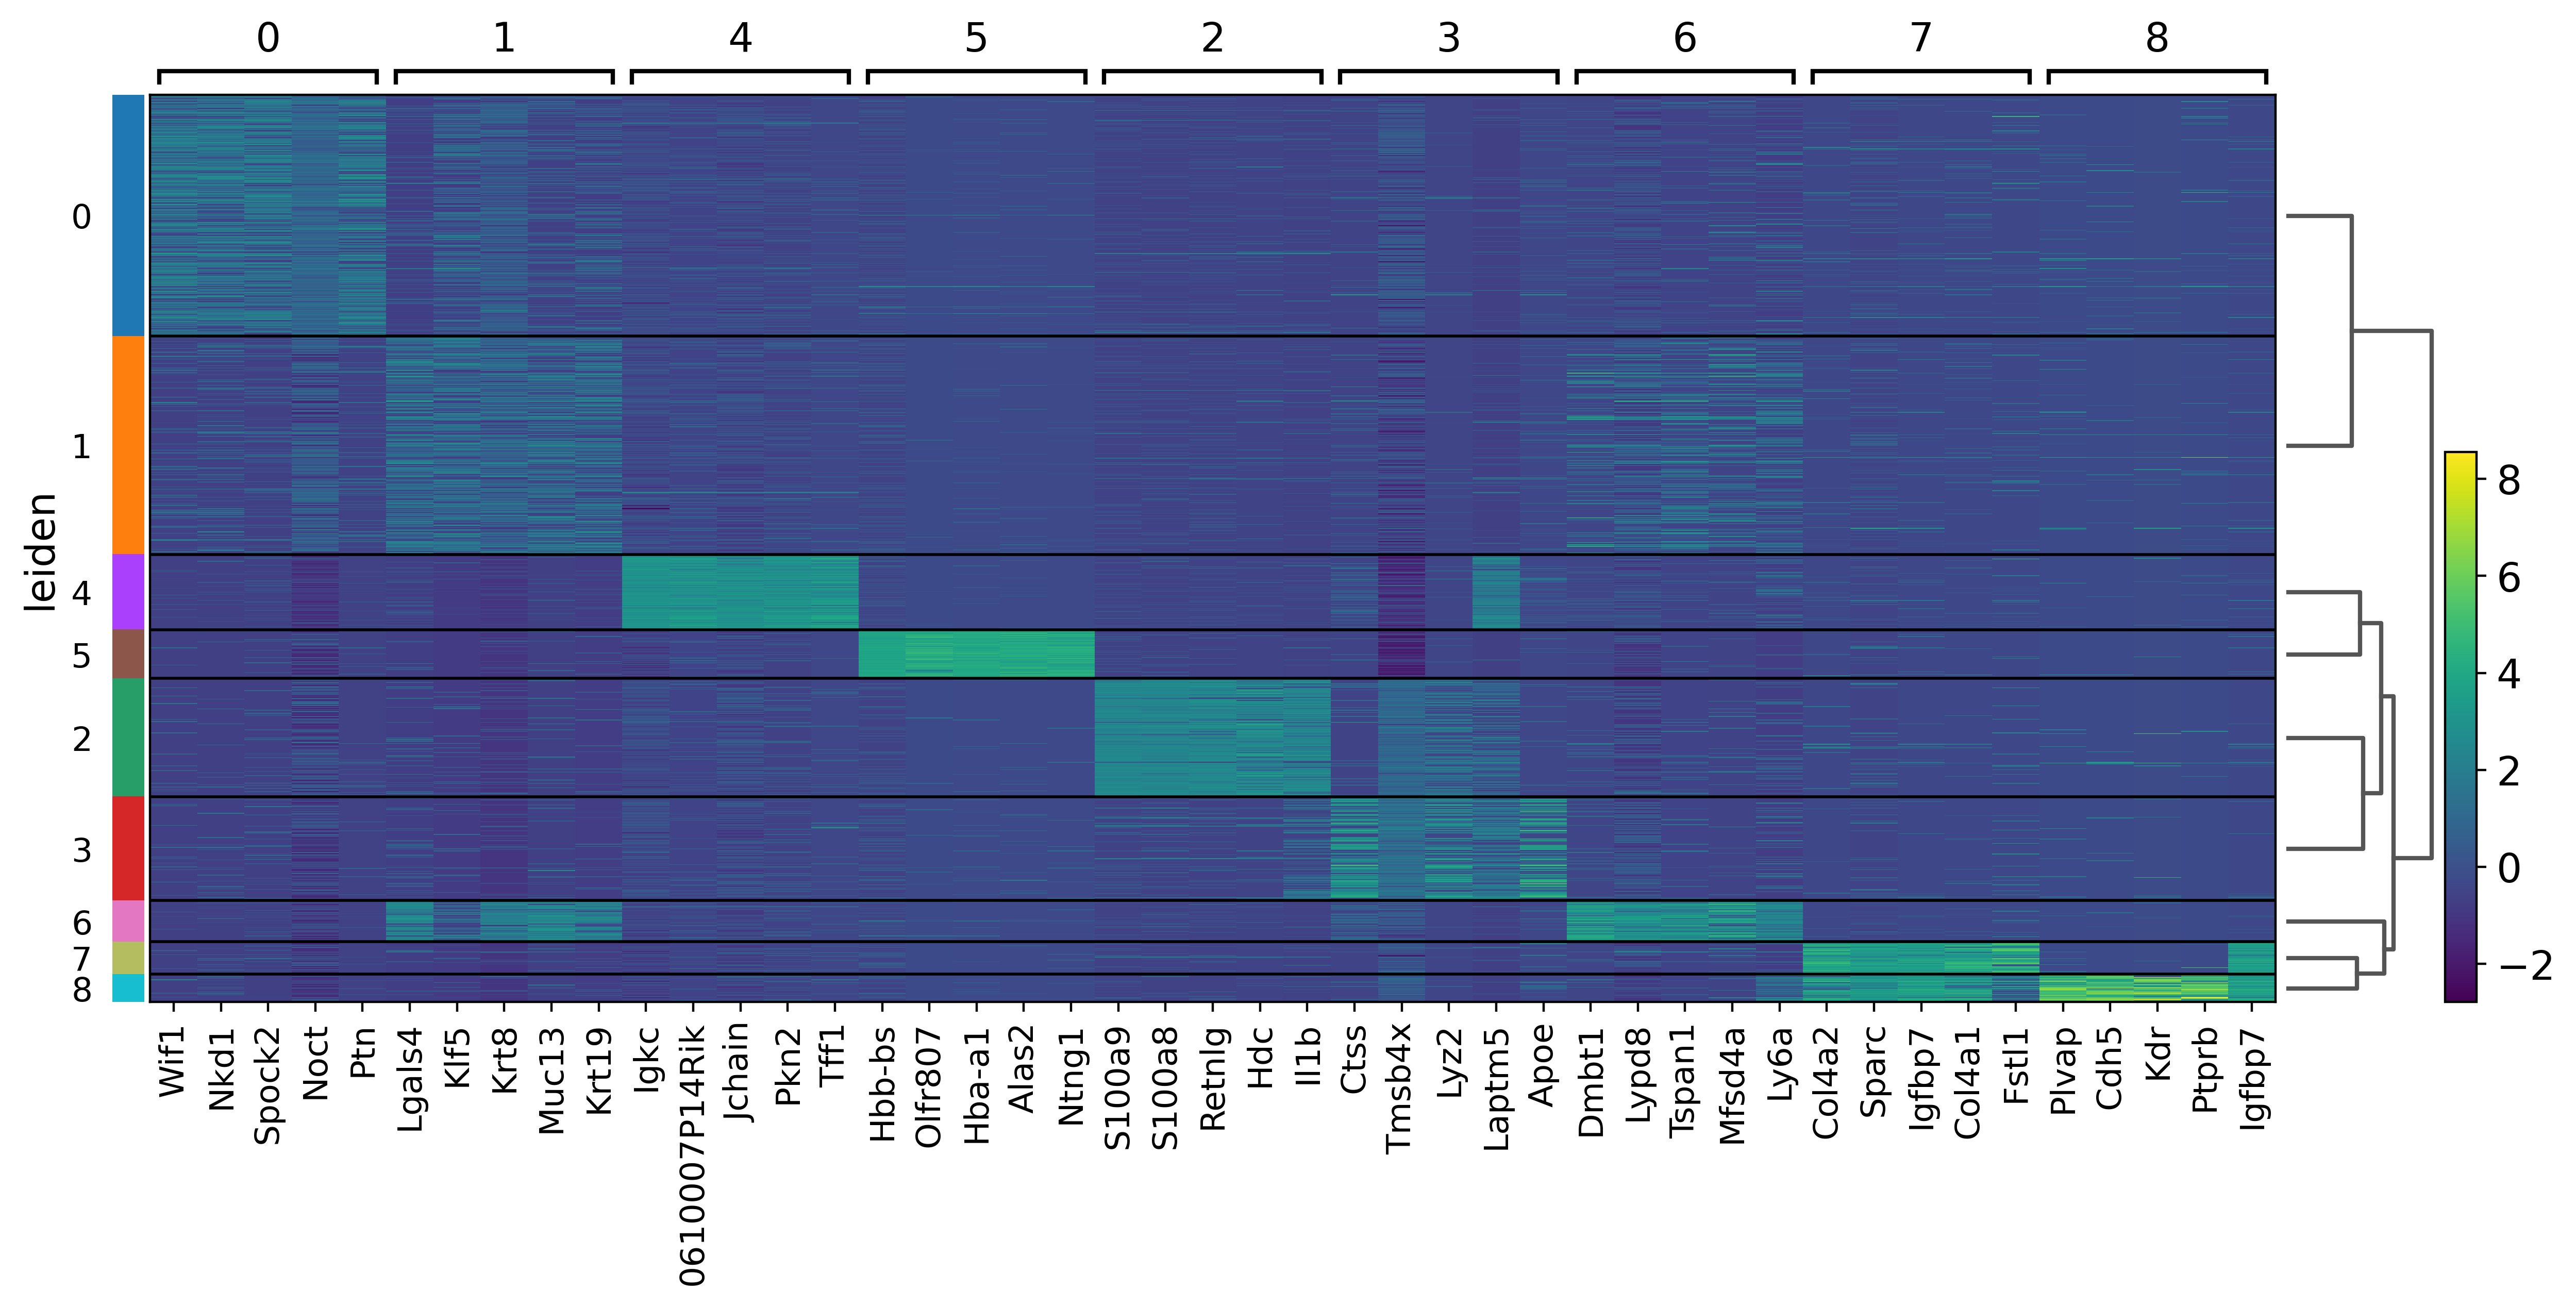

In [40]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=5, show_gene_labels=True, use_raw=False)

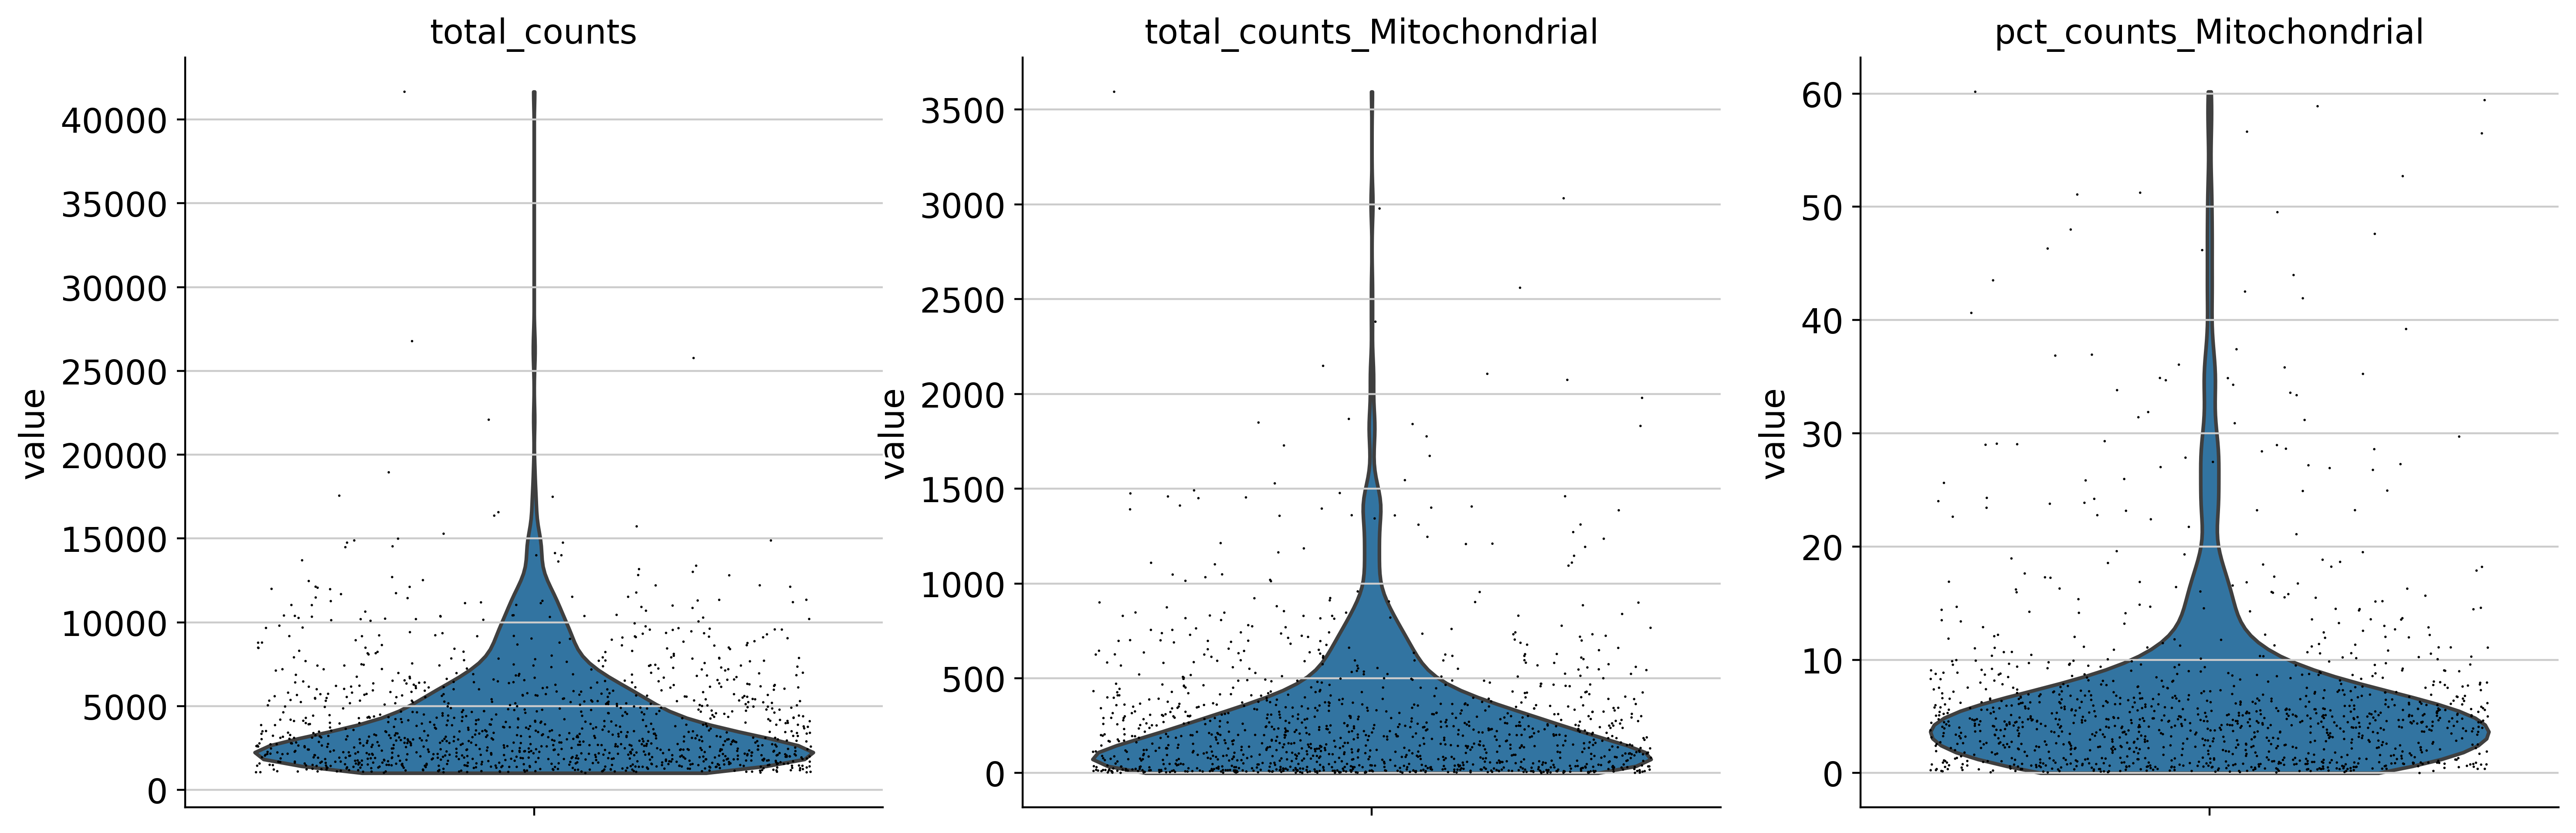

In [39]:
sc.pl.violin(adata,keys=['total_counts','total_counts_Mitochondrial','pct_counts_Mitochondrial'],jitter=0.4,multi_panel=True)

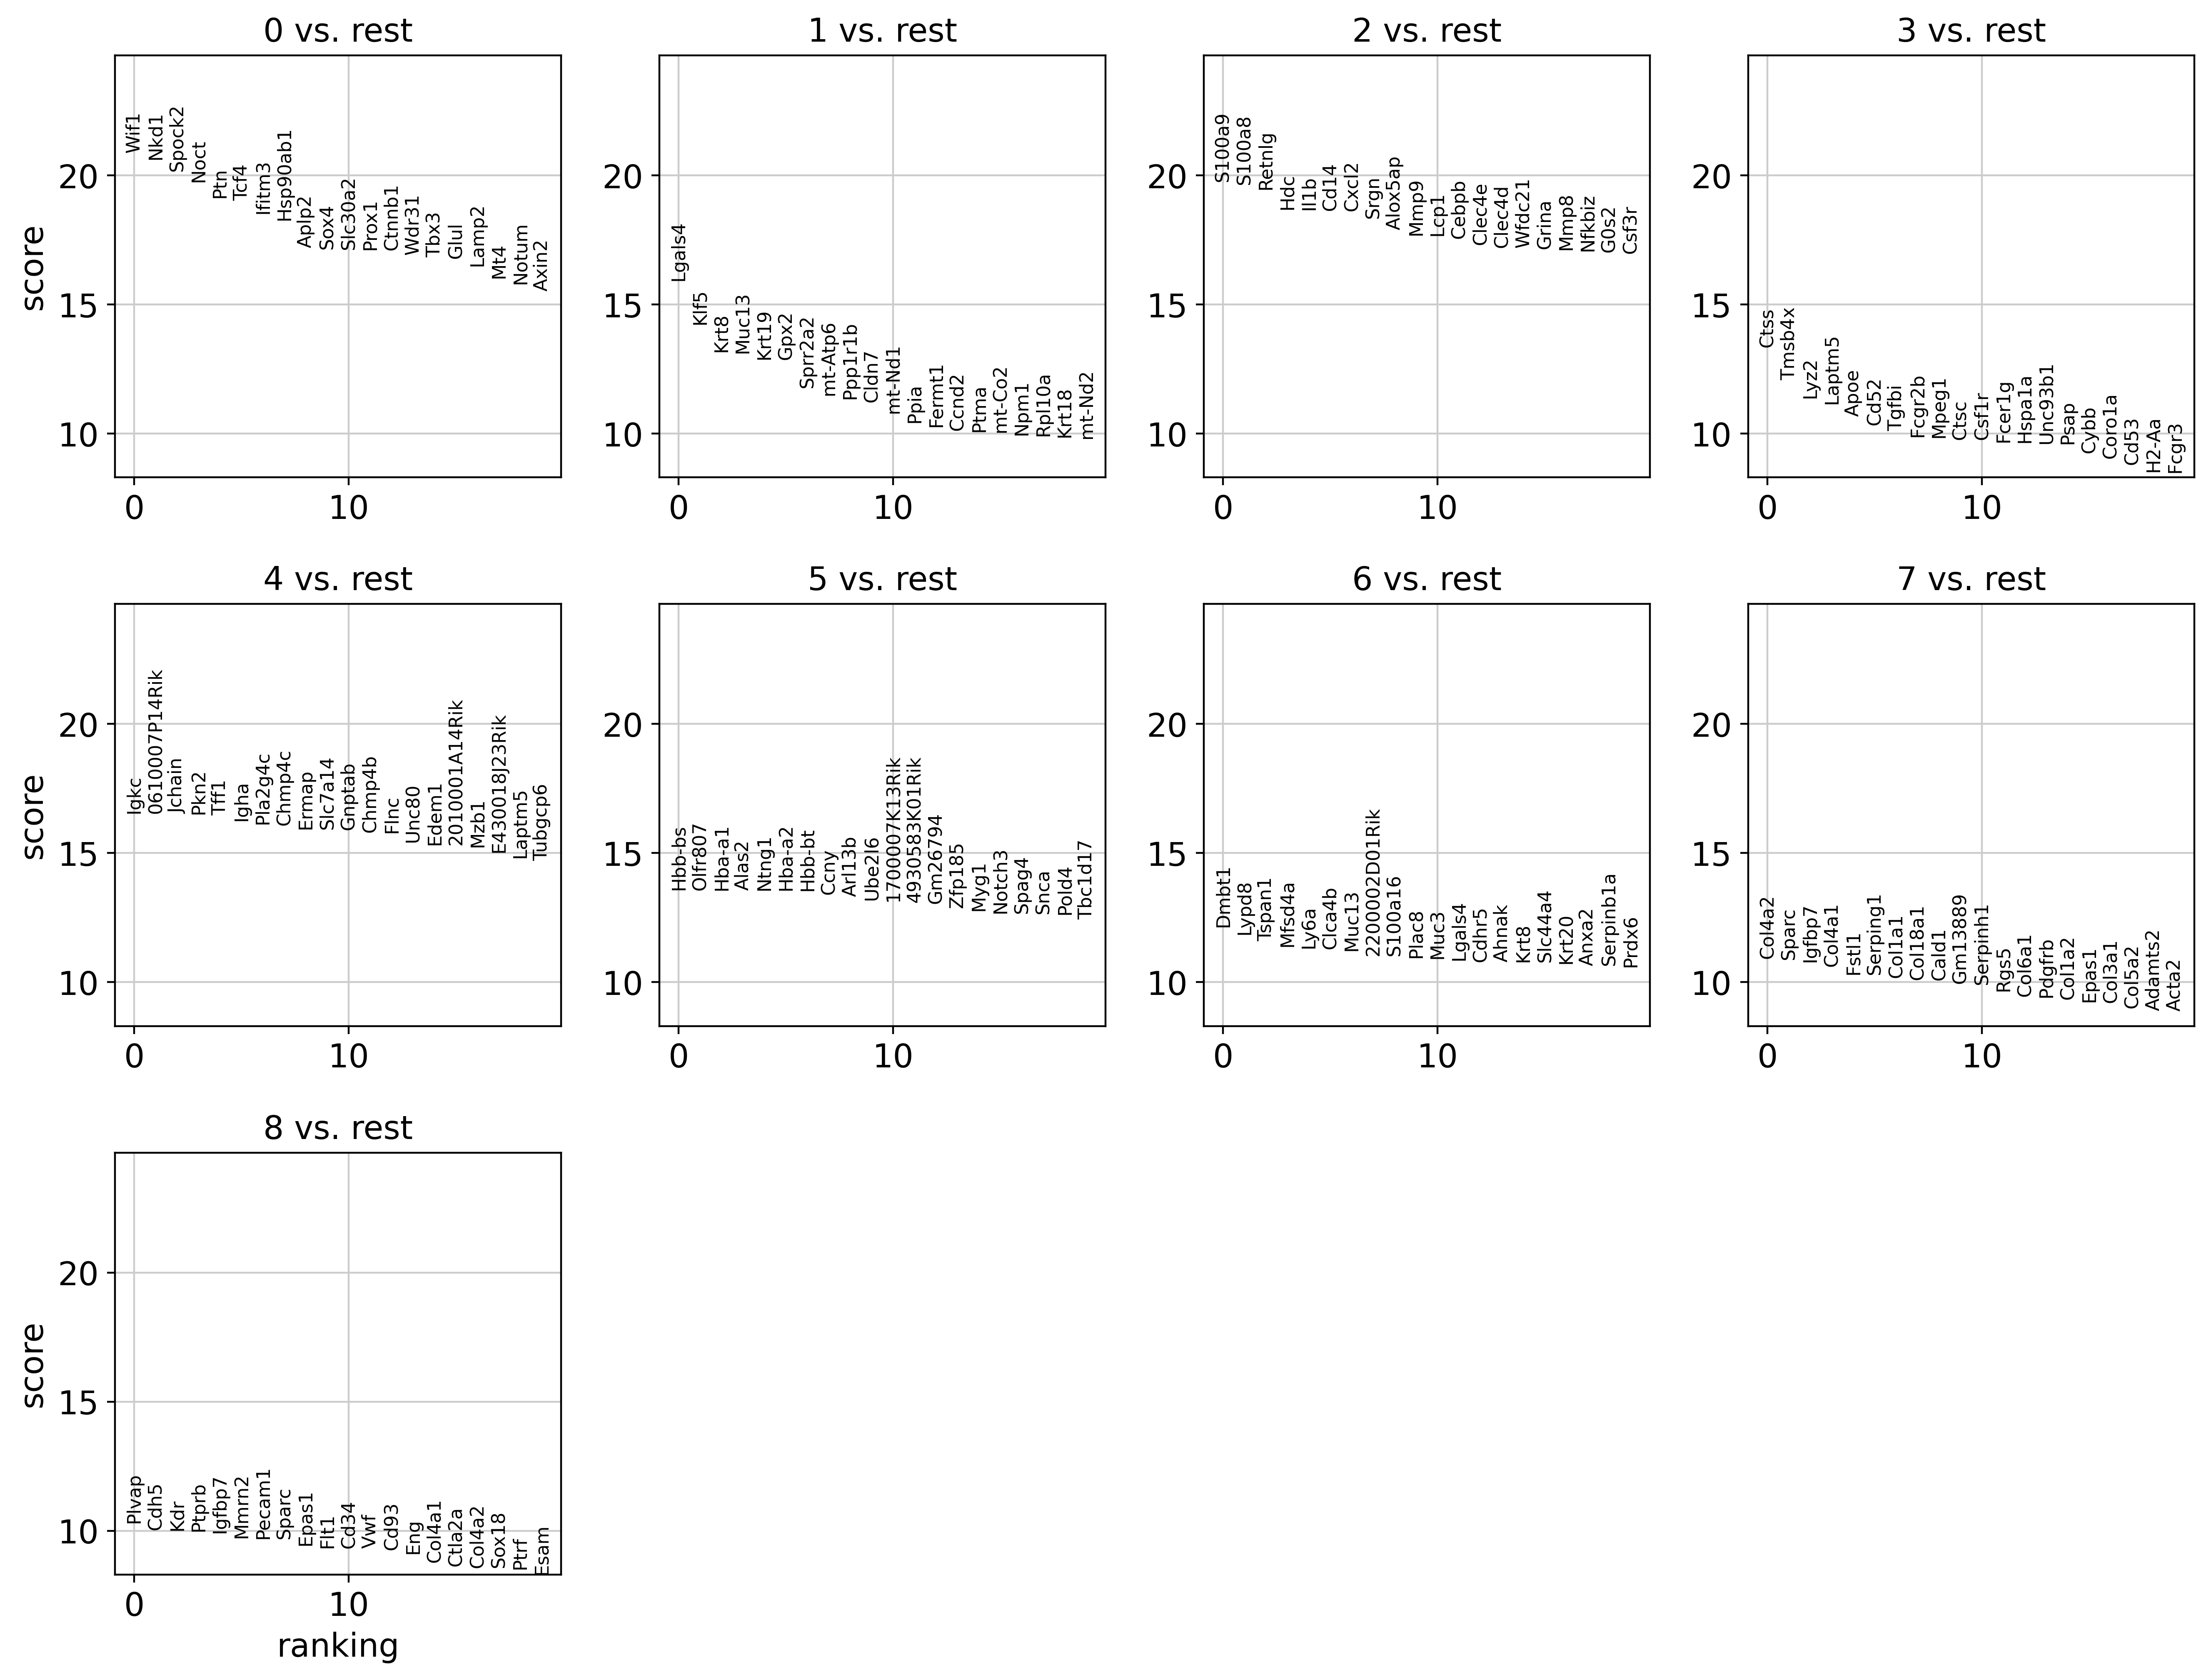

In [41]:
#Show differential gene expression results
sc.pl.rank_genes_groups(adata)

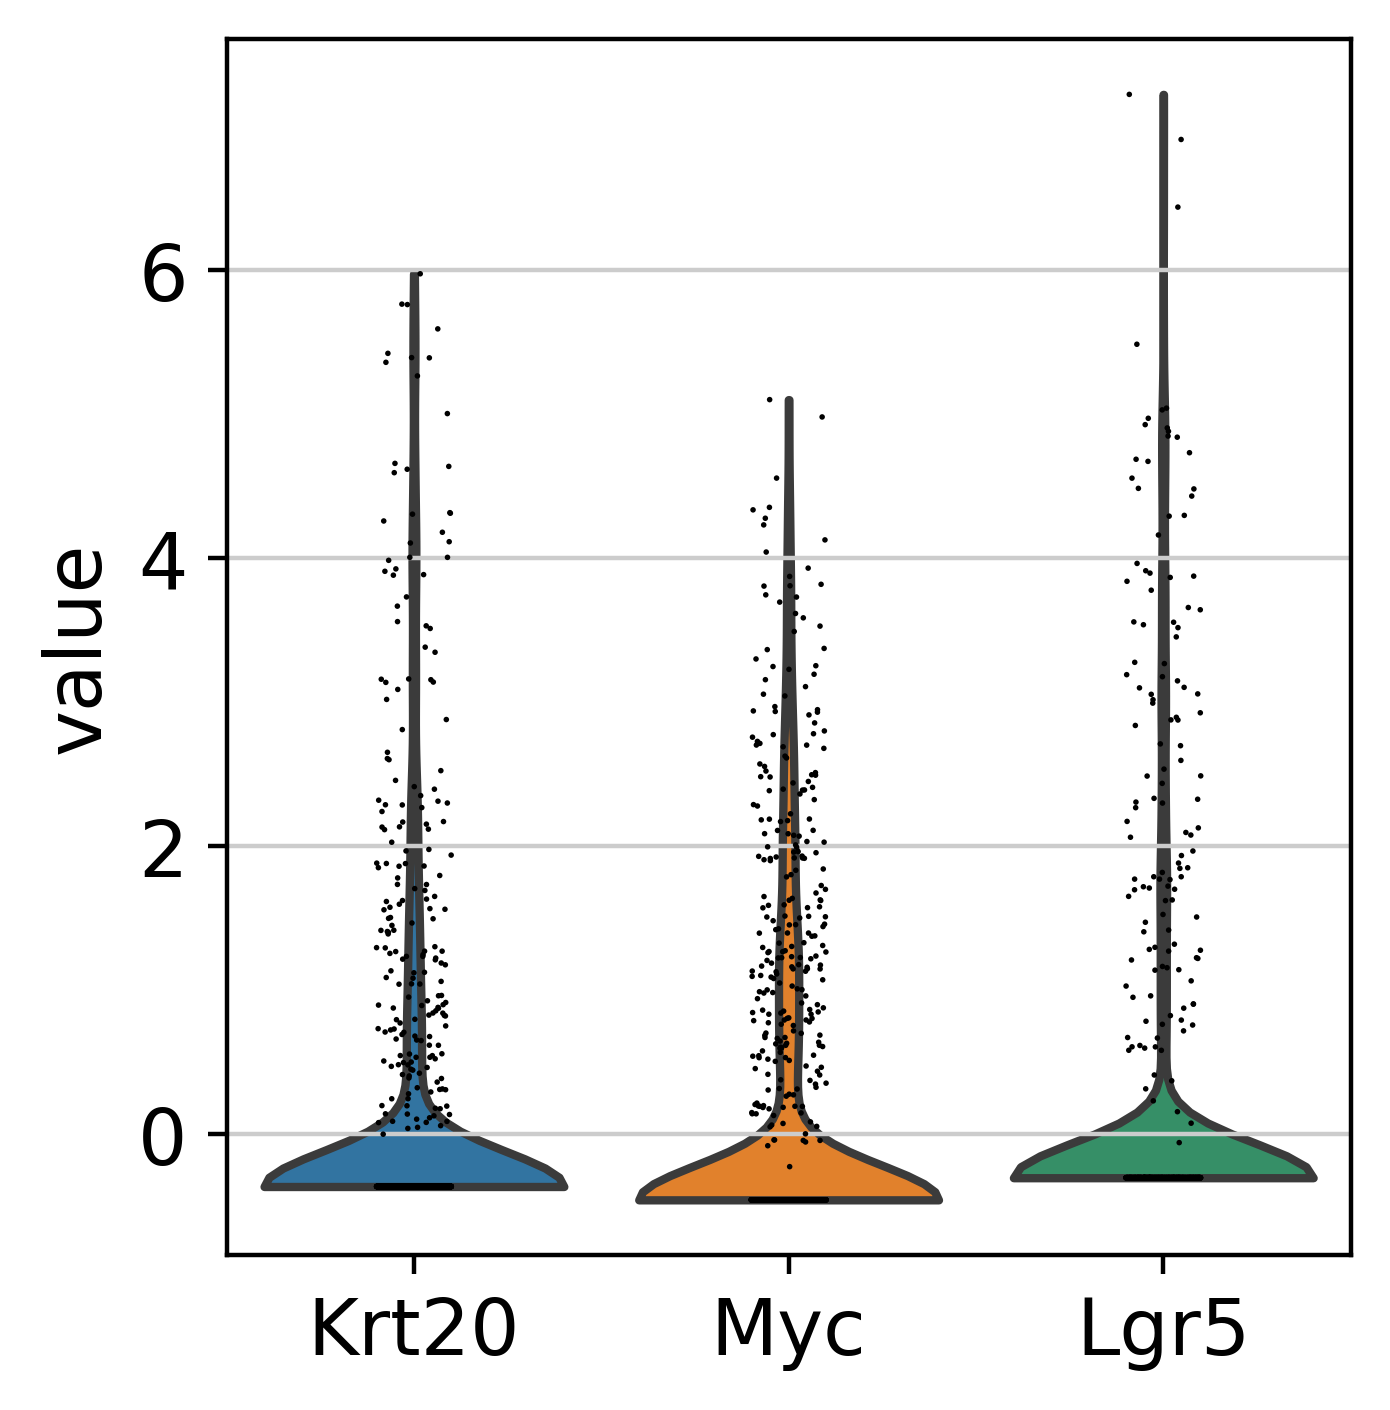

In [42]:
sc.pl.violin(adata,keys=['Krt20','Myc','Lgr5'],use_raw=False)

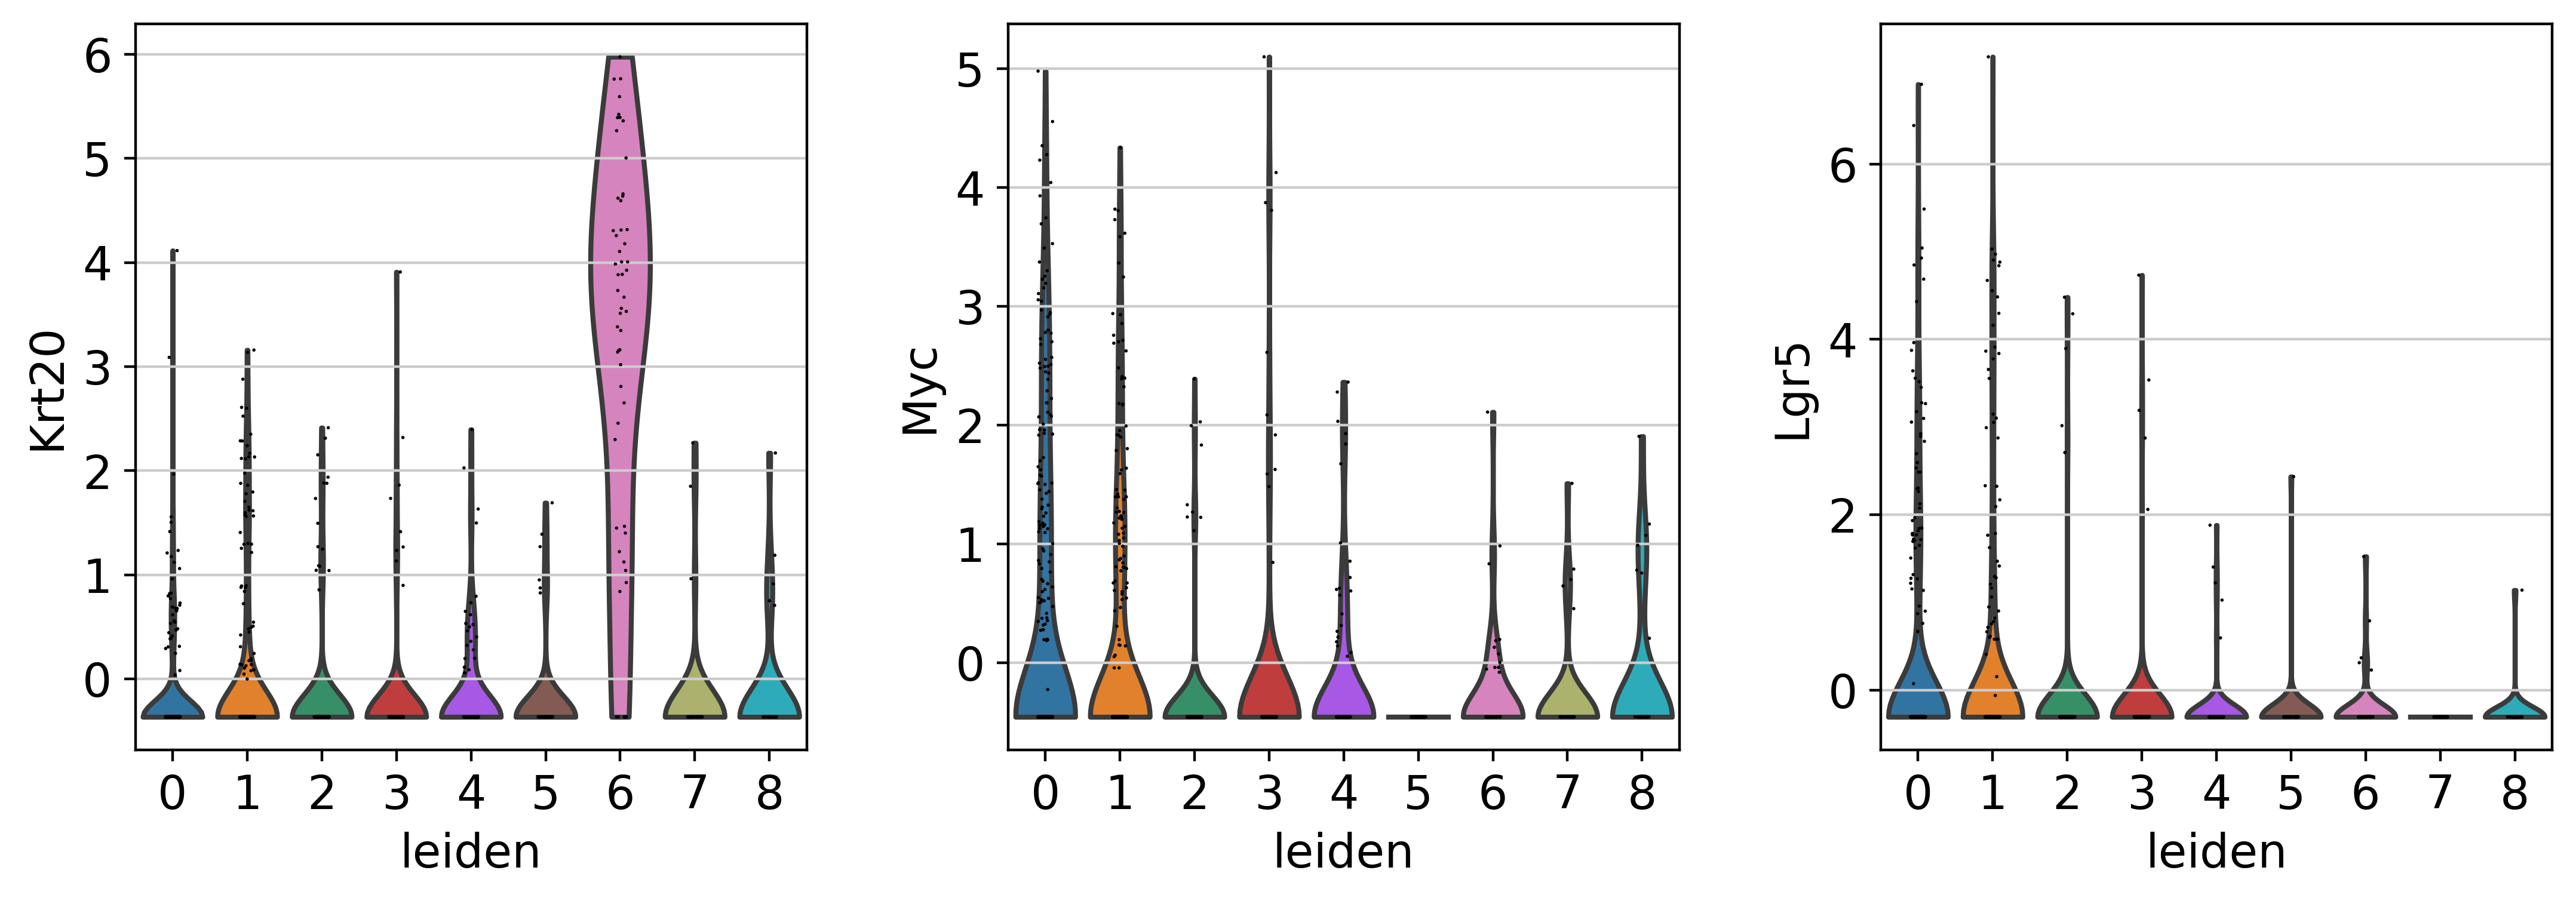

In [43]:
sc.pl.violin(adata,keys=['Krt20','Myc','Lgr5'],groupby='leiden',use_raw=False)

In [21]:
adata

AnnData object with n_obs × n_vars = 1206 × 25507
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_Mitochondrial', 'log1p_total_counts_Mitochondrial', 'pct_counts_Mitochondrial', 'leiden'
    var: 'mean', 'std', 'Mitochondrial', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'leiden', 'rank_genes_groups', 'dendrogram_leiden', 'leiden_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [44]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(10)

,0,1,2,3,4,5,6,7,8
0,Wif1,Lgals4,S100a9,Ctss,Igkc,Hbb-bs,Dmbt1,Col4a2,Plvap
1,Nkd1,Klf5,S100a8,Tmsb4x,0610007P14Rik,Olfr807,Lypd8,Sparc,Cdh5
2,Spock2,Krt8,Retnlg,Lyz2,Jchain,Hba-a1,Tspan1,Igfbp7,Kdr
3,Noct,Muc13,Hdc,Laptm5,Pkn2,Alas2,Mfsd4a,Col4a1,Ptprb
4,Ptn,Krt19,Il1b,Apoe,Tff1,Ntng1,Ly6a,Fstl1,Igfbp7
5,Tcf4,Gpx2,Cd14,Cd52,Igha,Hba-a2,Clca4b,Serping1,Mmrn2
6,Ifitm3,Sprr2a2,Cxcl2,Tgfbi,Pla2g4c,Hbb-bt,Muc13,Col1a1,Pecam1
7,Hsp90ab1,mt-Atp6,Srgn,Fcgr2b,Chmp4c,Ccny,2200002D01Rik,Col18a1,Sparc
8,Aplp2,Ppp1r1b,Alox5ap,Mpeg1,Ermap,Arl13b,S100a16,Cald1,Epas1
9,Sox4,Cldn7,Mmp9,Ctsc,Slc7a14,Ube2l6,Plac8,Gm13889,Flt1
